## Dataset Walkthrough

The dataset is a standard dataframe importabale through pandas. 

In [1]:
import pandas as pd

df_train = pd.read_csv("train.csv", index_col=0)
df_train.head()



,annotation_sequence,feat_A,feat_C,feat_D,feat_E,feat_F,feat_G,feat_H,feat_I,feat_K,...,feat_DSSP_10,feat_DSSP_11,feat_DSSP_12,feat_DSSP_13,coord_X,coord_Y,coord_Z,entry,entry_index,y_Ligand
0,M,False,False,False,False,False,False,False,False,False,...,0,0.0,47,-0.0,-26.499001,-4.742,-35.189999,GEMI5_HUMAN,0,False
1,G,False,False,False,False,False,True,False,False,False,...,0,0.0,0,0.0,-25.158001,-1.342,-34.104000,GEMI5_HUMAN,1,False
2,Q,False,False,False,False,False,False,False,False,False,...,1,-0.0,-1,-0.0,-21.926001,-1.641,-32.175999,GEMI5_HUMAN,2,False
3,E,False,False,False,True,False,False,False,False,False,...,706,-0.1,705,-0.0,-22.073999,0.654,-29.171000,GEMI5_HUMAN,3,False
4,P,False,False,False,False,False,False,False,False,False,...,0,0.0,705,-0.2,-19.783001,2.670,-26.858999,GEMI5_HUMAN,4,False


In [4]:
df_test = pd.read_csv("test.csv", index_col=0)
df_test.head()

,annotation_sequence,feat_A,feat_C,feat_D,feat_E,feat_F,feat_G,feat_H,feat_I,feat_K,...,feat_DSSP_9,feat_DSSP_10,feat_DSSP_11,feat_DSSP_12,feat_DSSP_13,coord_X,coord_Y,coord_Z,entry,entry_index
0,M,False,False,False,False,False,False,False,False,False,...,0.0,0,0.0,0,0.0,33.116001,37.023998,38.417000,QCR1_HUMAN,0
1,A,True,False,False,False,False,False,False,False,False,...,-0.0,2,-0.0,0,0.0,35.849998,34.841000,40.185001,QCR1_HUMAN,1
2,A,True,False,False,False,False,False,False,False,False,...,-0.1,0,0.0,2,-0.0,37.087002,31.719999,40.547001,QCR1_HUMAN,2
3,S,False,False,False,False,False,False,False,False,False,...,-0.1,0,0.0,-2,-0.0,38.095001,28.951000,42.321999,QCR1_HUMAN,3
4,V,False,False,False,False,False,False,False,False,False,...,0.0,0,0.0,0,0.0,41.435001,27.417000,43.703999,QCR1_HUMAN,4


In [5]:
df_train.columns

Index(['annotation_sequence', 'feat_A', 'feat_C', 'feat_D', 'feat_E', 'feat_F',
       'feat_G', 'feat_H', 'feat_I', 'feat_K', 'feat_L', 'feat_M', 'feat_N',
       'feat_P', 'feat_Q', 'feat_R', 'feat_S', 'feat_T', 'feat_V', 'feat_W',
       'feat_Y', 'annotation_atomrec', 'feat_PHI', 'feat_PSI', 'feat_TAU',
       'feat_THETA', 'feat_BBSASA', 'feat_SCSASA', 'feat_pLDDT', 'feat_DSSP_H',
       'feat_DSSP_B', 'feat_DSSP_E', 'feat_DSSP_G', 'feat_DSSP_I',
       'feat_DSSP_T', 'feat_DSSP_S', 'feat_DSSP_6', 'feat_DSSP_7',
       'feat_DSSP_8', 'feat_DSSP_9', 'feat_DSSP_10', 'feat_DSSP_11',
       'feat_DSSP_12', 'feat_DSSP_13', 'coord_X', 'coord_Y', 'coord_Z',
       'entry', 'entry_index', 'y_Ligand'],
      dtype='object')

All columns with the `feat_*` prefix are boolean, integer, or float features that describe the residue itself.  These can be used for training a model.  Domain knowledge of these values should not be necessary to participate in the challenge, but we've provided brief descriptions below for anyone who may be interested:

* `feat_[letter]` are one-hot encoded boolean values for each of the 20 possible amino acids.
* `feat_PHI`, `feat_PSI`, `feat_TAU`, `feat_THETA` describe various protein chain bonding angles, computed with [Biopython](https://biopython.org/docs/1.75/api/Bio.PDB.Polypeptide.html).
* `feat_BBSASA`, `feat_SCSASA` describe the solvent accessible surface area, calculated using [FreeSASA](https://freesasa.github.io/).
* `feat_pLDDT` is an AlphaFold2 residue-level prediction confidence value.
* `feat_DSSP_[letter]` are secondary structure assignments by [DSSP].(https://en.wikipedia.org/wiki/DSSP_(algorithm))
* `feat_DSSP_[number]` are other backbone structural features describing backbone hydrogen. bonding networks, also assigned by [DSSP](https://en.wikipedia.org/wiki/DSSP_(algorithm)).

Column `y_Ligand` indicates if the residue (row) belongs to a known binding site or not.  This column is the classification objective for our challenge. 

The remaining columns describe other elements of the protein structure for reference or troubleshooting purposes.  Participants may use this information to to engineer new features/representations in their models if they so choose. These include:
* `annotation_sequence` and `annotation_atomrec`: Residue amino acid in character format.
* `entry`: Protein name, can be looked up on Uniprot for more information about the protein.  Each unique entry is one unique protein structure in this dataset.
* `coord_X`, `coord_Y`, `coord_Z`: XYZ coordinates of the residue in the respective protein structure.  For example, all residues for protein 'QCR1_HUMAN' belong to the same coordinate space, but the coordinate space would shared between two residues (rows) with `entry` values of 'QCR1_HUMAN' and 'PPM1A_HUMAN'.
* `entry_index`: The order of the amino acid within the protein sequence.  As with coordinates, these relationships are only meaningful for rows (residues) that share the same `entry` value.  For example, within QCR1_HUMAN two residues (rows) with `entry_index` 5 and 6 are adjacent (connected) neighbors.

The test dataset has the same format, but is otherwise missing the `y_Ligand` column. 

## Data Overview

In [6]:
df_train.shape

(497166, 50)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497166 entries, 0 to 759
Data columns (total 50 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   annotation_sequence  497166 non-null  object 
 1   feat_A               497166 non-null  bool   
 2   feat_C               497166 non-null  bool   
 3   feat_D               497166 non-null  bool   
 4   feat_E               497166 non-null  bool   
 5   feat_F               497166 non-null  bool   
 6   feat_G               497166 non-null  bool   
 7   feat_H               497166 non-null  bool   
 8   feat_I               497166 non-null  bool   
 9   feat_K               497166 non-null  bool   
 10  feat_L               497166 non-null  bool   
 11  feat_M               497166 non-null  bool   
 12  feat_N               497166 non-null  bool   
 13  feat_P               497166 non-null  bool   
 14  feat_Q               497166 non-null  bool   
 15  feat_R              

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107624 entries, 0 to 478
Data columns (total 49 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   annotation_sequence  107624 non-null  object 
 1   feat_A               107624 non-null  bool   
 2   feat_C               107624 non-null  bool   
 3   feat_D               107624 non-null  bool   
 4   feat_E               107624 non-null  bool   
 5   feat_F               107624 non-null  bool   
 6   feat_G               107624 non-null  bool   
 7   feat_H               107624 non-null  bool   
 8   feat_I               107624 non-null  bool   
 9   feat_K               107624 non-null  bool   
 10  feat_L               107624 non-null  bool   
 11  feat_M               107624 non-null  bool   
 12  feat_N               107624 non-null  bool   
 13  feat_P               107624 non-null  bool   
 14  feat_Q               107624 non-null  bool   
 15  feat_R              

* Categorical object features:  annotation_sequence, annotation_atomrec, entry
* Boolean features: y_Ligand, feat_DSSP_[letter], feat_[letter]
* Numerical features: feat_PHI ~ feat_pLDDT, feat_DSSP_6 ~ feat_DSSP_13, coord_X ~ coord_Z
* Mixed data types: entry
* Features contain errors and missing values: annotation_atomrec

* Observations: [Annotation automorec] is the only variable with missing values.
* Decision: impute [Annotation automorec] later

In [9]:
df_train.describe()

,feat_PHI,feat_PSI,feat_TAU,feat_THETA,feat_BBSASA,feat_SCSASA,feat_pLDDT,feat_DSSP_6,feat_DSSP_7,feat_DSSP_8,feat_DSSP_9,feat_DSSP_10,feat_DSSP_11,feat_DSSP_12,feat_DSSP_13,coord_X,coord_Y,coord_Z,entry_index
count,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,4.971660e+05,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000
mean,-1.162007,0.780075,-0.108342,1.854782,16.746550,5.209644e+01,75.733749,-1.789849,-1.160675,1.754382,-1.140480,-0.053135,-0.177757,0.128386,-0.201625,-3.927826,1.956133,-1.099622,535.495128
std,1.039634,1.520499,1.833996,0.469940,18.494097,4.792873e+01,26.971019,58.176800,1.058466,60.429611,1.062049,57.906105,0.156652,61.219479,0.232904,25.770530,20.641283,26.637590,665.740408
min,-3.141557,-3.141564,-3.141578,0.000000,0.000000,-2.842171e-14,0.000000,-2281.000000,-4.000000,-2281.000000,-4.000000,-2280.000000,-1.800000,-2281.000000,-2.900000,-149.393997,-114.931000,-152.839005,0.000000
25%,-1.686451,-0.654101,-2.067246,1.590771,1.239801,5.274057e+00,55.360000,-4.000000,-2.200000,-1.000000,-2.200000,-2.000000,-0.200000,-2.000000,-0.200000,-18.850000,-9.518750,-16.964001,172.000000
50%,-1.199133,0.241335,0.775206,1.756220,8.788650,4.352778e+01,89.530000,-2.000000,-0.700000,2.000000,-0.600000,1.000000,-0.200000,-1.000000,-0.200000,-2.881000,1.206000,-0.681000,365.000000
75%,-1.047934,2.297116,0.966645,2.122055,29.958422,8.623462e+01,95.960000,0.000000,-0.200000,4.000000,-0.200000,2.000000,-0.100000,2.000000,-0.100000,11.469000,13.148000,14.147000,667.000000
max,3.141575,3.141584,3.141568,3.137176,99.338342,2.200520e+02,98.980000,2281.000000,0.000000,2281.000000,0.000000,2281.000000,0.000000,2282.000000,0.000000,162.250000,103.135002,176.059998,7384.000000


### What's the distribution of numerical features
* feat_PHI, feat_PSI, feat_TAU has a small ranges that cover postive and negegative values
* feat_THETA, feat_BBSASA are all positive, but feat_BBSASA has larger range up to 99.3
* feat_SCSASA has large negative and positive range
* feat_pLDDT has a similar range as feat_BBSASA

* From feat_DSSP_6 to feat_DSSP_7, the range of odd number indexed columns are from -4 to 0, the range of even number indexed columns are from -2281 to 2281
* The mean values from feat_DSSP_6 to feat_DSSP_9 are around -1.1, the mean values fo feat_DSSP_10 to feat_DSSP_10 are close to 0

In [10]:
df_train.describe(include = 'O')

,annotation_sequence,annotation_atomrec,entry
count,497166,484477,497166
unique,20,20,723
top,L,L,MACF1_HUMAN
freq,47881,46400,7385


In [11]:
df_train.groupby('annotation_sequence').annotation_sequence.count().sort_values(ascending=False)

annotation_sequence
L    47881
S    38156
E    36491
A    34007
G    32340
V    31113
K    30993
P    28124
R    27623
T    25884
D    25495
I    24057
Q    22886
N    19190
F    18326
Y    14222
H    12345
M    11712
C    10365
W     5956
Name: annotation_sequence, dtype: int64

In [12]:
df_train.groupby('annotation_atomrec').annotation_sequence.count().sort_values(ascending=False)

annotation_atomrec
L    46400
S    37097
E    35264
A    33142
G    31770
V    30421
K    30146
P    27619
R    26959
T    25121
D    24806
I    23458
Q    21991
N    18717
F    17994
Y    14039
H    12048
M    11449
C    10209
W     5827
Name: annotation_sequence, dtype: int64

### What is the distribution of categorical variables?
* L is the mode of amino acid types for residues, W is the least frequent type
* There is a roughly linear pattern in ranking the frequency of annotations from top to bottom
* Entry values has a pattern of [alnum]_HUMAN, it is probable that alphanumerical values in the first part delivers more useful information.

In [13]:
feat_DSSP_number = ['feat_DSSP_6', 'feat_DSSP_7', 'feat_DSSP_8', 'feat_DSSP_9', 
                    'feat_DSSP_10', 'feat_DSSP_11', 'feat_DSSP_12', 'feat_DSSP_13']
df_train[feat_DSSP_number].head()

,feat_DSSP_6,feat_DSSP_7,feat_DSSP_8,feat_DSSP_9,feat_DSSP_10,feat_DSSP_11,feat_DSSP_12,feat_DSSP_13
0,0,0.0,2,-0.3,0,0.0,47,-0.0
1,1,-0.0,2,-0.2,0,0.0,0,0.0
2,-2,-0.3,708,-0.1,1,-0.0,-1,-0.0
3,-2,-0.2,2,-0.1,706,-0.1,705,-0.0
4,0,0.0,2,-0.3,0,0.0,705,-0.2


Some feat_DSSP are integer valued but the others are decimal values. Different value format might have some reason and could have different effect on the response.

In [14]:
feat_letters = ['feat_PHI', 'feat_PSI', 'feat_THETA', 'feat_TAU', 
                'feat_BBSASA', 'feat_SCSASA', 'feat_pLDDT']
df_train[feat_letters].head()

,feat_PHI,feat_PSI,feat_THETA,feat_TAU,feat_BBSASA,feat_SCSASA,feat_pLDDT
0,0.000000,2.257610,1.956201,-2.375020,80.020602,137.023818,38.49
1,-1.100680,2.224168,1.900792,-2.654037,69.542382,0.000000,46.08
2,-1.295398,2.676551,2.458310,-1.696727,23.387401,88.587659,65.42
3,-2.352796,2.665542,2.054226,-2.810012,4.908812,44.521273,85.17
4,-1.134474,2.612150,2.272191,-2.754863,9.742674,52.613700,93.24


In [15]:
print(df_train['annotation_sequence'].unique())
print(df_train['annotation_atomrec'].unique())
print(df_train['entry'].unique())


['M' 'G' 'Q' 'E' 'P' 'R' 'T' 'L' 'S' 'N' 'W' 'Y' 'C' 'A' 'D' 'V' 'F' 'I'
 'H' 'K']
['M' 'G' 'Q' 'E' 'P' 'R' 'T' 'L' 'S' 'N' 'W' 'Y' 'C' 'A' 'D' 'V' 'F' 'I'
 'H' 'K' nan]
['GEMI5_HUMAN' 'ACHB4_HUMAN' 'RFC2_HUMAN' 'THIO_HUMAN' 'ADH7_HUMAN'
 'DPYL5_HUMAN' 'SRPRA_HUMAN' 'ATTY_HUMAN' 'TN13B_HUMAN' 'ATLA1_HUMAN'
 'GALE_HUMAN' 'BUB1B_HUMAN' 'PRS6A_HUMAN' 'SMYD3_HUMAN' 'ARP2_HUMAN'
 'IL1B_HUMAN' 'MDHM_HUMAN' 'CACO2_HUMAN' 'SRP54_HUMAN' 'GRM3_HUMAN'
 'RIOK1_HUMAN' 'AOFA_HUMAN' 'ORC1_HUMAN' 'NLRP3_HUMAN' 'ALAT2_HUMAN'
 'RIOK2_HUMAN' 'ACADV_HUMAN' 'NUMA1_HUMAN' 'GBP1_HUMAN' 'TKT_HUMAN'
 'KDM1B_HUMAN' 'TNPO1_HUMAN' 'DPOLB_HUMAN' 'CBPA2_HUMAN' 'PYC_HUMAN'
 'MCLN1_HUMAN' 'UCHL1_HUMAN' 'SCAR5_HUMAN' 'PE2R3_HUMAN' 'S14L2_HUMAN'
 'AT2A2_HUMAN' 'TAF2_HUMAN' 'DHTK1_HUMAN' 'PHF8_HUMAN' 'HMDH_HUMAN'
 'AMPE_HUMAN' 'IVD_HUMAN' 'MRP1_HUMAN' 'R144A_HUMAN' 'METH_HUMAN'
 'CPSM_HUMAN' 'ACACB_HUMAN' 'MACD2_HUMAN' 'FFAR1_HUMAN' 'ZN224_HUMAN'
 'RFC1_HUMAN' 'M2GD_HUMAN' 'SELB_HUMAN' 'LRRT2_HUMAN' 'CMC2_HUMAN'
 'IF5_H

* Observations: sequence variables are elementry. Entries are composite and various.
* Decision: feature engineering is needed for [`entry`] to extrat useful information

In [16]:
df_train.entry_index.head(30)

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
Name: entry_index, dtype: int64

* Observation: entry index is identical as the row index
* Decision: delete entry index in data wrangling

In [17]:
df_train.y_Ligand.mean()

0.03470470627516765

## Analysis by Visualization

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Questions: 
* What is the distribution of `annotation_atomrec` and `annotation_sequence` by protein binding sites?
* What is the distribution of `feat_PHI` to `feat_pLDDT` given the `y_Ligand`?
* What is the distribution of XYZ coordinates marginally given `y_Ligand`? How about pairwise joint distribution? 3D joint distribution?
* What is conditional distribution of `feat_DSSP_6` to `feat_DSSP_13` given `y_Ligand`?
* What is pairwise joint distribution of `feat_DSSP_6` to `feat_DSSP_13` given `y_Ligand`?

In [3]:
## Sample 5000 records from the training set for visualization
train_samp = df_train.sample(n = 5000, replace=False, random_state= 226)
train_samp.shape

(5000, 50)

In [4]:
train_samp.to_csv("sample5000.csv")

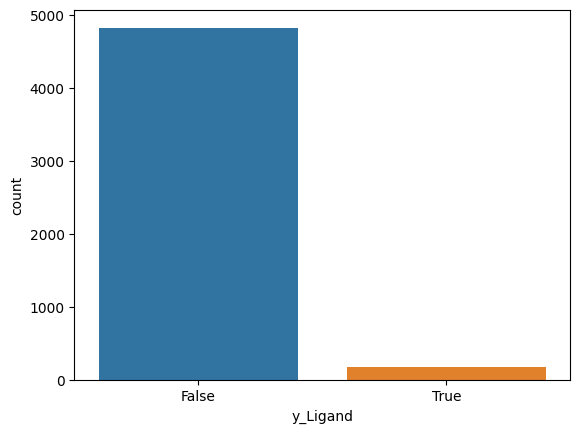

In [93]:
resp_plot = sns.countplot(x = train_samp.y_Ligand)
plt.show()

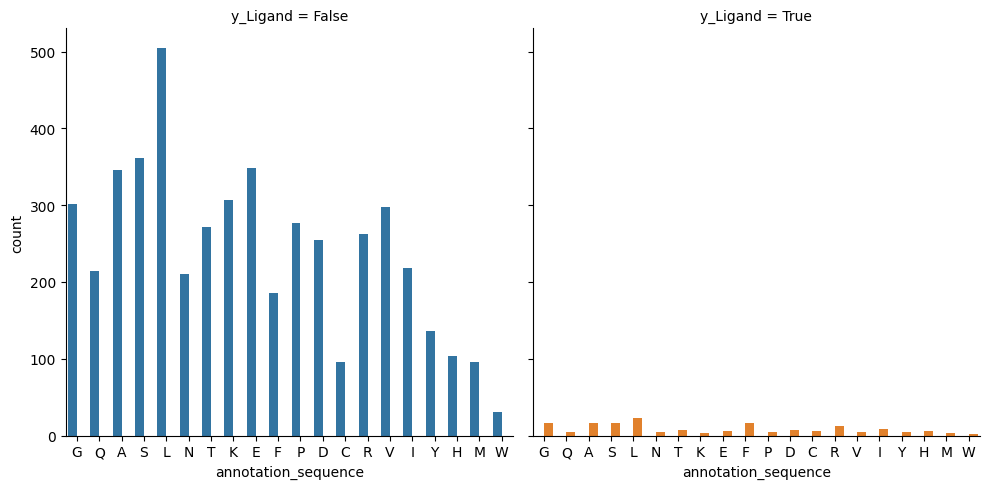

In [94]:
# Distribution of annotation_sequence and atomrec
sns.catplot(data = train_samp, x = 'annotation_sequence', kind = 'count',
            col = 'y_Ligand', hue = 'y_Ligand')
plt.show()

Observations:
* Strong imbalance between non-drug binding sites and binding sites is obvious
* A,S,L are the top 3 frequent amino acid in both classes, H,M,W are the least frequent amino acid in both classes. 
* F is not too frequent among non-binding sites but quite common in binding sites.

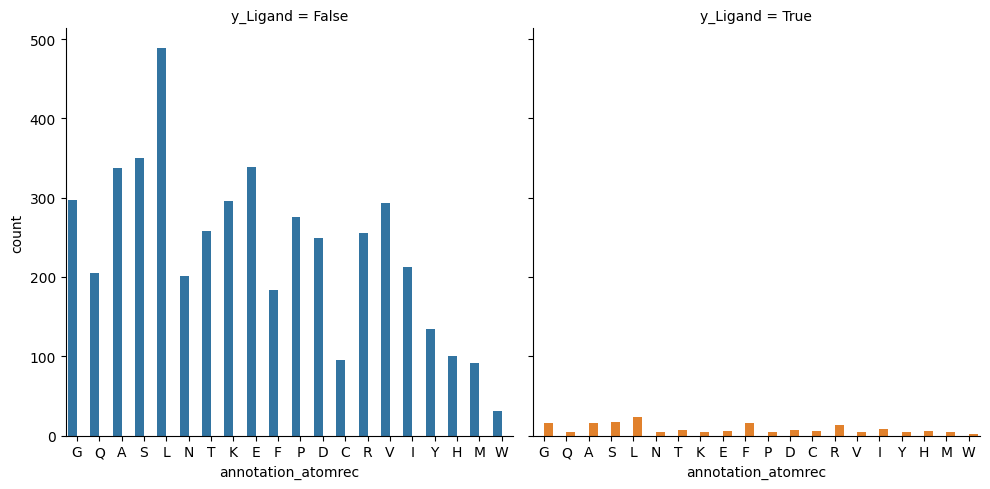

In [95]:
sns.catplot(data = train_samp, x = 'annotation_atomrec', kind = 'count',
            col = 'y_Ligand', hue = 'y_Ligand')
plt.show()

In [96]:
# distribution of `feat_PHI` to `feat_pLDDT` given the `y_Ligand`
i, j = 0,0
f, axs = plt.subplots(nrows =4, ncols=3, figsize = (12,12))
for feat in feat_letters:
    sns.catplot(data = train_samp, x='y_Ligand', y = feat, 
                hue='y_Ligand', kind = 'strip', ax = axs[i, j])
    i += 1
    if i == 2:
        i = 0
        j += 1

plt.show()

C:\Users\wjx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)
C:\Users\wjx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)
C:\Users\wjx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)
C:\Users\wjx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_q

IndexError: index 3 is out of bounds for axis 1 with size 3

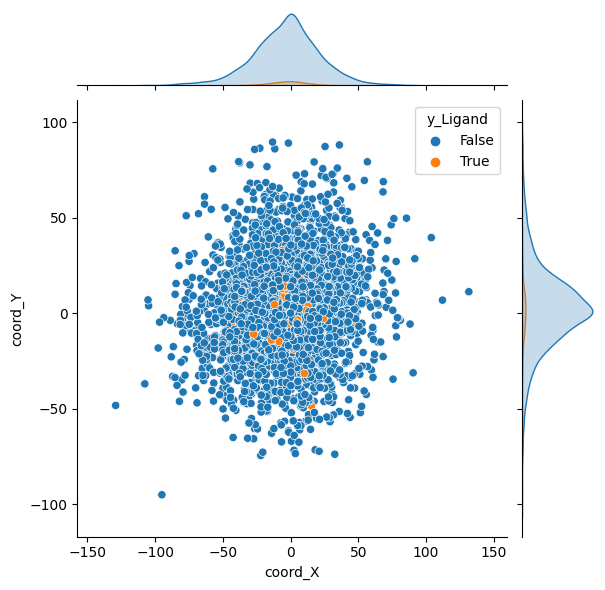

In [99]:
## pairwise distribution of the 3 coordinates
coordinates = ['coord_X', 'coord_Y', 'coord_Z', 'y_Ligand']
samp_coord = train_samp[coordinates]
samp_coord = samp_coord.reset_index(drop=True)
sns.jointplot(data = samp_coord, x= 'coord_X', y='coord_Y', hue='y_Ligand')
plt.show()

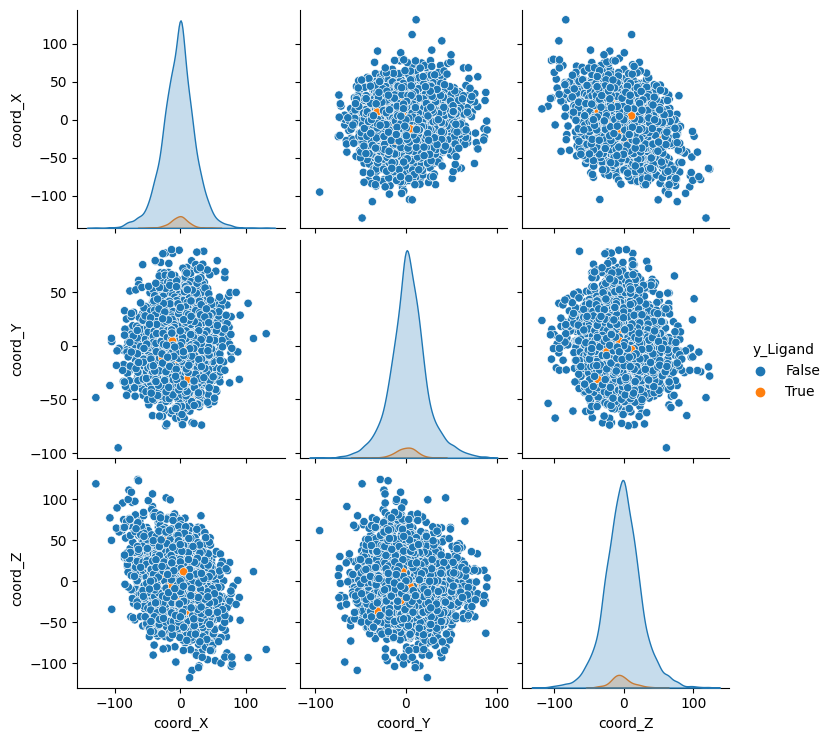

In [101]:
sns.pairplot(data = samp_coord, hue='y_Ligand')
plt.show()

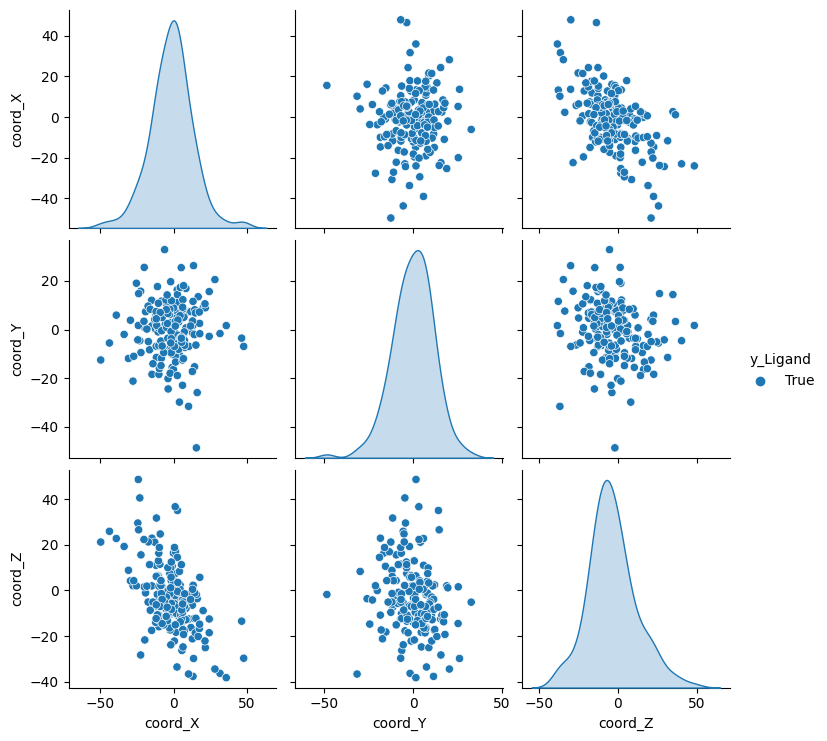

In [102]:
sns.pairplot(data = samp_coord.query('y_Ligand == True'), hue='y_Ligand')
plt.show()

Observations:
* Coordinate X and Z have some linear relationships
* Binding sites and non-binding sites have the same central tendency.]
* For binding sites, coordinate X and Z, Y and Z show negative linear relationship

### Let's try fitting a model to this dataset
- We will use XGBoost to demonstrate, but there are many more models out there + other Neural Networks based approaches! Go Explore!
- The train set is further split into train and test (usually we call this validation set) to evaluate before letting the model predict on the actual test set
- For simplicity, we have also dropped all categorical columns (columns with string values, etc). These can be useful, so try to use it in your training!

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train.drop(["y_Ligand"], axis=1), df_train["y_Ligand"], test_size=0.2, random_state=42)

In [ ]:
without_categorical_columns = [col for col in X_train.columns if X_train[col].dtype != "O"]

In [ ]:
import xgboost 
xgb = xgboost.XGBClassifier()
xgb.fit(X_train[without_categorical_columns], y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_test_pred = xgb.predict(X_test[without_categorical_columns])

In [ ]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred, pos_label=1)
auc_roc = metrics.auc(fpr, tpr)

precision, recall, _ = metrics.precision_recall_curve(y_test, y_test_pred)
auc_pr = metrics.auc(recall, precision)

print(f"ROC-AUC: {auc_roc} \n PR-AUC {auc_pr}")

ROC-AUC: 0.5718825477920486 
 PR-AUC 0.47969894069233676


## Submission Instructions

- Run inference on the test set and save the inference results as a csv file, the file should look like this
```
id,Predicted
0,True
1,False
2,True
3,False
....
```
- Submit the csv on Kaggle
- Automatic evaluation will be done with ROC-AUC
- Top submissions will be further evaluated by the mean of ROC-AUC and PR-AUC

In [ ]:
df_test = pd.read_csv("af2_dataset_testset_unlabeled.csv.gz", index_col=0)
df_test

,annotation_sequence,feat_A,feat_C,feat_D,feat_E,feat_F,feat_G,feat_H,feat_I,feat_K,...,feat_DSSP_9,feat_DSSP_10,feat_DSSP_11,feat_DSSP_12,feat_DSSP_13,coord_X,coord_Y,coord_Z,entry,entry_index
0,M,False,False,False,False,False,False,False,False,False,...,0.0,0,0.0,0,0.0,33.116001,37.023998,38.417000,QCR1_HUMAN,0
1,A,True,False,False,False,False,False,False,False,False,...,-0.0,2,-0.0,0,0.0,35.849998,34.841000,40.185001,QCR1_HUMAN,1
2,A,True,False,False,False,False,False,False,False,False,...,-0.1,0,0.0,2,-0.0,37.087002,31.719999,40.547001,QCR1_HUMAN,2
3,S,False,False,False,False,False,False,False,False,False,...,-0.1,0,0.0,-2,-0.0,38.095001,28.951000,42.321999,QCR1_HUMAN,3
4,V,False,False,False,False,False,False,False,False,False,...,0.0,0,0.0,0,0.0,41.435001,27.417000,43.703999,QCR1_HUMAN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,L,False,False,False,False,False,False,False,False,False,...,-0.5,-3,-0.3,-3,-0.0,47.813999,7.569000,-27.368999,PDE7A_HUMAN,474
475,P,False,False,False,False,False,False,False,False,False,...,-0.1,0,0.0,-3,-0.0,50.228001,8.068000,-30.333000,PDE7A_HUMAN,475
476,Q,False,False,False,False,False,False,False,False,False,...,-0.0,0,0.0,0,0.0,51.507999,4.896000,-31.959999,PDE7A_HUMAN,476
477,E,False,False,False,True,False,False,False,False,False,...,0.0,0,0.0,0,0.0,54.845001,6.372000,-33.125000,PDE7A_HUMAN,477


In [ ]:
y_test_submission = xgb.predict(df_test[without_categorical_columns])

In [ ]:
s = pd.Series(y_test_submission).astype(bool)
s.name = "Predicted"
s.to_csv("submission.csv")